# HW 1
### by Lev Tsipes

In [ ]:
!pip install PyDTMC

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 KB 3.4 MB/s eta 0:00:00


In [ ]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pydtmc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
import networkx as nx

In [ ]:
# example
p = [[0.2, 0.7, 0.0, 0.1], [0.0, 0.6, 0.3, 0.1], [0.0, 0.0, 1.0, 0.0], [0.5, 0.0, 0.5, 0.0]]
mc = pydtmc.MarkovChain(p, ['A', 'B', 'C', 'D'])
print(mc)


DISCRETE-TIME MARKOV CHAIN
 SIZE:           4
 RANK:           4
 CLASSES:        2
  > RECURRENT:   1
  > TRANSIENT:   1
 ERGODIC:        NO
  > APERIODIC:   YES
  > IRREDUCIBLE: NO
 ABSORBING:      YES
 REGULAR:        NO
 REVERSIBLE:     YES
 SYMMETRIC:      NO



Task 1

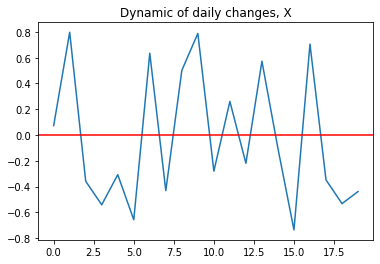

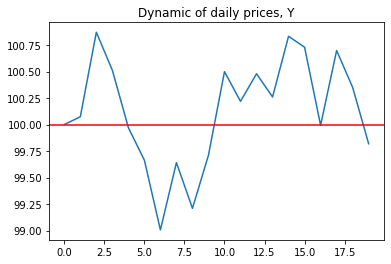

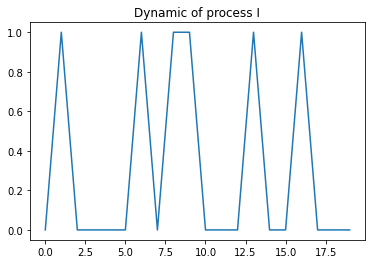

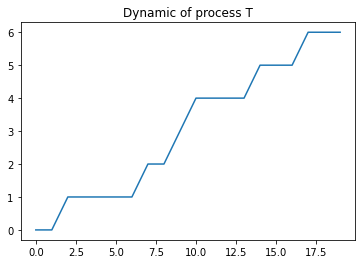

In [ ]:
initial_price = 100
sequence_of_changes = np.random.uniform( -0.8, 1, 20)
plt.plot(sequence_of_changes)
plt.axhline(0, c='r')
plt.title('Dynamic of daily changes, X')
plt.show()
Y = [100+np.sum(sequence_of_changes[:i]) for i in range(20)]
plt.plot(Y)
plt.axhline(100, c='r')
plt.title('Dynamic of daily prices, Y')
plt.show()
I = [1 if x==True else 0 for x in list(map(lambda x:x>=0.5, sequence_of_changes))]
plt.plot(I)
plt.title('Dynamic of process I')
plt.show()
T = [0+np.sum(I[:i]) for i in range(20)]
plt.plot(T)
plt.title('Dynamic of process T')
plt.show()

𝐼 is a Bernoulli process. Let P(𝐼(n)=1)==p, then p = (1-0.5)/(1+0.8) = 0.28

Τ is an arrival process. Its distribution is described by formula below, where p is 0.28 and Y=T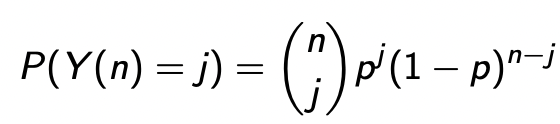

In [ ]:
# task (e)
# (T (20) > 5) = 1 - (T (20) == 5) - (T (20) == 4) - (T (20) == 3) - (T (20) == 2) - (T (20) == 1) = (T (20) == 0)
# according to the formula that would be 0.50482
# T((20) = 18)=0 (very close to)

t= 0.84409


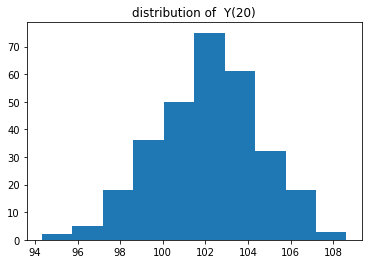

In [ ]:
# task (f)
y_vector = list()
for i in range(300):
  sequence_of_changes = np.random.uniform( -0.8, 1, 20)
  Y = [100+np.sum(sequence_of_changes[:i]) for i in range(20)]
  y_vector.append(Y[-1])
plt.hist(y_vector)
plt.title('distribution of  Y(20)')
plt.show()

In [ ]:
# I would say that distribution is normal due to uniformly distributed X, with the mean-median=mode of 102 and st deviation of 2.4
print('mean', np.mean(y_vector))
print('st deviation', np.std(y_vector))

mean 102.09796236114424
st deviation 2.4210602316237098


In [ ]:
# task h
# According to the numbers calculated above, p~=0.2


Task **2**

In [ ]:
# one step = 10 minutes. On plots below, X axis is steps, not minutes
p = [[0.7, 0.2, 0.1], 
     [0.3, 0.3, 0.4], 
     [0.2, 0.4, 0.4]]
mc = pydtmc.MarkovChain(p, ['Sleep', 'Lunch', 'Wheel'])

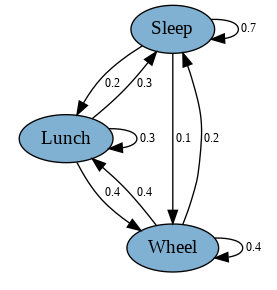

In [ ]:
pydtmc.plot_graph(mc, dpi=300)

In [ ]:
print('Example of simulation')
print(mc.simulate(6, seed=32))

Example of simulation
['Lunch', 'Lunch', 'Lunch', 'Wheel', 'Wheel', 'Lunch', 'Lunch']


In [ ]:
from numpy.linalg import matrix_power
matrix_power(p, 6)

# so, if hamster eats, probabilty for him to sleep after 60 minuts would be 0.452614

array([[0.255296, 0.417024, 0.226688, 0.082944, 0.018048],
       [0.208512, 0.36864 , 0.249984, 0.131392, 0.041472],
       [0.113344, 0.249984, 0.273344, 0.249984, 0.113344],
       [0.041472, 0.131392, 0.249984, 0.36864 , 0.208512],
       [0.018048, 0.082944, 0.226688, 0.417024, 0.255296]])

In [ ]:
print(matrix_power(p, 2))
#if the hamster is currently sleeping the distribution after 2 steps would be [0.57 0.24 0.19]

[[0.57 0.24 0.19]
 [0.38 0.31 0.31]
 [0.34 0.32 0.34]]


In [ ]:
print(matrix_power(p, 6))
# and [0.461441 0.278824 0.259735] after 6th step

[[0.461441 0.278824 0.259735]
 [0.452614 0.281951 0.265435]
 [0.450714 0.282624 0.266662]]


Task **3**

In [ ]:
#task a

n = 5
prob = 0.4
p = [[0 for y in range(n)] for i in range(n)]

for i in range(n-1):
  if i > 0: 
    p[i][i]+=1-prob
    p[i][i+1]+=(prob)/2
    p[i][i-1]+=(prob)/2
  if i == 0:
    p[i][0]+=1-prob
    p[i][1]+=prob
p[n-1][n-1]+=1-prob
p[n-1][n-1-1]+=prob

mc = pydtmc.MarkovChain(p, [str(i) for i in range(1,6)])


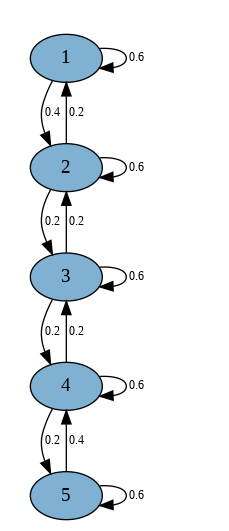

In [ ]:
pydtmc.plot_graph(mc, dpi=600)

In [ ]:
print('Example of simulation')
print(mc.simulate(10,initial_state='1', seed=32))

Example of simulation
['1', '2', '2', '2', '3', '3', '4', '3', '4', '4', '4']


In [ ]:
print(matrix_power(p, 5))
print('Probability that the process is in state 1 after 5 steps if it started in state 1 is', 0.27936)

[[0.27936 0.4384  0.2112  0.06144 0.0096 ]
 [0.2192  0.38496 0.24992 0.1152  0.03072]
 [0.1056  0.24992 0.28896 0.24992 0.1056 ]
 [0.03072 0.1152  0.24992 0.38496 0.2192 ]
 [0.0096  0.06144 0.2112  0.4384  0.27936]]
Probability that the process is in state 1 after 5 steps if it started in state 1 is 0.27936


distributions over the state 1 if the precoess strated in 1 is
[0.6 0.4 0.  0.  0. ]


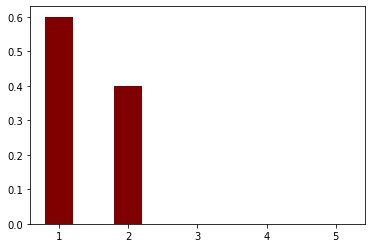



distributions over the state 2 if the precoess strated in 1 is
[0.44 0.48 0.08 0.   0.  ]


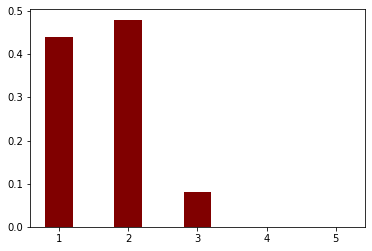



distributions over the state 3 if the precoess strated in 1 is
[0.36  0.48  0.144 0.016 0.   ]


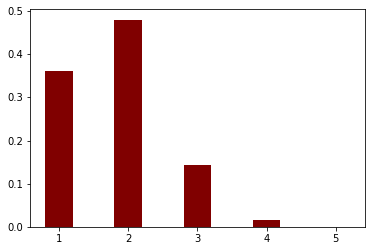



distributions over the state 4 if the precoess strated in 1 is
[0.312  0.4608 0.1856 0.0384 0.0032]


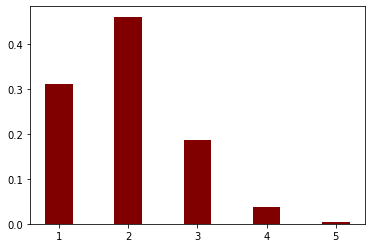



distributions over the state 5 if the precoess strated in 1 is
[0.27936 0.4384  0.2112  0.06144 0.0096 ]


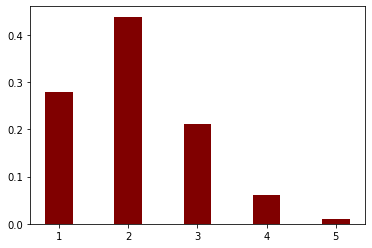



distributions over the state 6 if the precoess strated in 1 is
[0.255296 0.417024 0.226688 0.082944 0.018048]


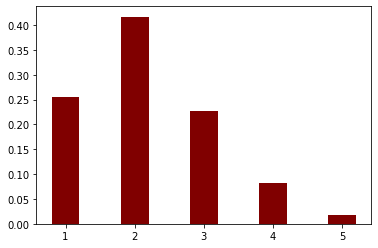



distributions over the state 7 if the precoess strated in 1 is
[0.2365824 0.3976704 0.2360064 0.1023232 0.0274176]


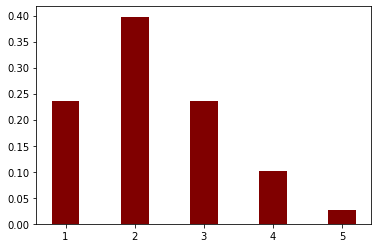



distributions over the state 8 if the precoess strated in 1 is
[0.22148352 0.38043648 0.24160256 0.11956224 0.0369152 ]


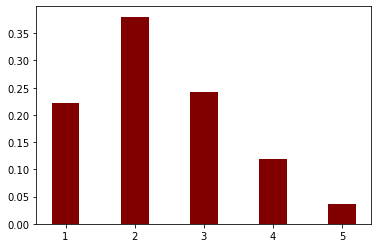



distributions over the state 9 if the precoess strated in 1 is
[0.20897741 0.36517581 0.24496128 0.13482394 0.04606157]


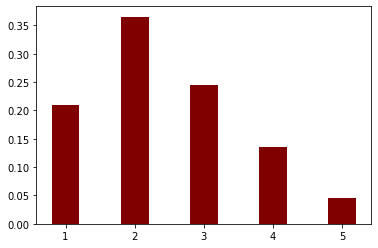



distributions over the state 10 if the precoess strated in 1 is
[0.19842161 0.3516887  0.24697672 0.14831124 0.05460173]


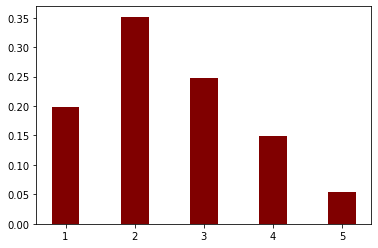

In [ ]:
import matplotlib.pyplot as plt

for i in range(1,11):
  print('distributions over the state', i, 'if the precoess strated in 1 is')
  print(matrix_power(p, i)[0])
  plt.bar([str(i) for i in range(1,6)], matrix_power(p, i)[0], color ='maroon', width = 0.4)
  plt.show()
  print('\n')
